## Inferences and Analysis

Python Notebook for computation of Centrality Measures as


1.   Degree Centrality
2.   Betweenness Centrality
3.   Closeness Centrality
4.   Eigen Vector Centrality

and other graph inferences

In [ ]:
import pandas as pd
import numpy as np
import csv
import folium
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import operator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

railway_data = pd.read_csv("/content/drive/MyDrive/Network Science Project/Data/Train_details_22122017.csv")
modified_railway_data = railway_data.dropna()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Railway_Network = nx.read_gpickle("/content/drive/MyDrive/Network Science Project/Data/Railway Network train_count_weighted.gpickle")
print(nx.info(Railway_Network))

Name: 
Type: DiGraph
Number of nodes: 8147
Number of edges: 902602
Average in degree: 110.7895
Average out degree: 110.7895


In [ ]:
def compute_centrality(Railway_Network, description, railway_data):
  centrality = {}
  if description == "Degree":
    centrality = nx.degree_centrality(Railway_Network)
  elif description == "Betweenness":
    centrality = nx.betweenness_centrality(Railway_Network)
  elif description == "Closeness":
    centrality = nx.closeness_centrality(Railway_Network)
  elif description == "Eigen Vector":
    centrality = nx.eigenvector_centrality_numpy(Railway_Network)
  else:
    print("Incorrect input centrality measure")
    
  centrality = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)[:10]
  stations = []
  for item in centrality:
    station_code = item[0]
    stations.append((railway_data.loc[railway_data['Station Code'] == station_code]['Station Name'].to_list()[0], item[1]))
  
  return stations

**COMPUTE DEGREE CENTRALITY**

Definition: 
Degree centrality computes an importance score based on the number of nodes by which each node is connected.

***Inference: 
Degree Centrality tells us what are the most popular, or well-connected nodes in the network.***

These nodes have the most one-hop connections to other nodes or Stations in our case. These nodes can connect to the wider network in less number of hops. In our network, the most connected stations, holding the most information are the following:

HOWRAH JN. 		 
VIJAYWADA JN 	
KANPUR CENTR 	
VARANASI JN. 		 
GHAZIABAD JN 		 
KALYAN JN 		 
ITARSI 		 
LUCKNOW JN. 		 
AHMEDABAD 		 
MATHURA JN. 	

In [ ]:
DegreeCentrality_stations = compute_centrality(Railway_Network, "Degree", railway_data)
print("Top Stations in the Indian Railway System acc to the Degree Centrality:\n\n \tSTATION NAME\t\t BETWEENNESS CENTRALITY")
for item in DegreeCentrality_stations:
  print("\t",item[0],"\t\t",item[1])

Top Stations in the Indian Railway System acc to the Degree Centrality:

 	STATION NAME		 BETWEENNESS CENTRALITY
	 HOWRAH JN. 		 0.30211146575006137
	 VIJAYWADA JN 		 0.2704394794991407
	 KANPUR CENTR 		 0.263810459121041
	 VARANASI JN. 		 0.25767247728946724
	 GHAZIABAD JN 		 0.25202553400441935
	 KALYAN JN 		 0.24797446599558065
	 ITARSI 		 0.24441443653326786
	 LUCKNOW JN. 		 0.243677878713479
	 AHMEDABAD 		 0.23852197397495703
	 MATHURA JN. 		 0.2363123005155905


In [ ]:
def print_on_india_map(coodinates, centrality, scale=50):
  center_lat, center_long = 20.5937, 78.9629
  map = folium.Map(location=[center_lat, center_long], zoom_start=4.5)

  for itr, coordinate in enumerate(coordinates):
    folium.CircleMarker(
            location=[coordinate[0], coordinate[1]],
            radius = float(centrality[itr][1]*scale),
            popup= str(centrality[itr][1]),
            tooltip = str(centrality[itr][0]),
            color="black",
            fill_color="black"
        ).add_to(map)
  return map

# fetched from google
coordinates = [(22.5839, 88.3434), (16.5187, 80.6200), (26.4537, 80.3513), (25.3268, 82.9863), (28.6532, 77.4290), (19.2362, 73.1302), (22.6085, 77.7671), (26.8317, 80.9221), (23.0273, 72.6008), (27.4790, 77.6734)]
print_on_india_map(coordinates, DegreeCentrality_stations)

Since the Map is interactive, here is a GIF to demonstrate how it works.

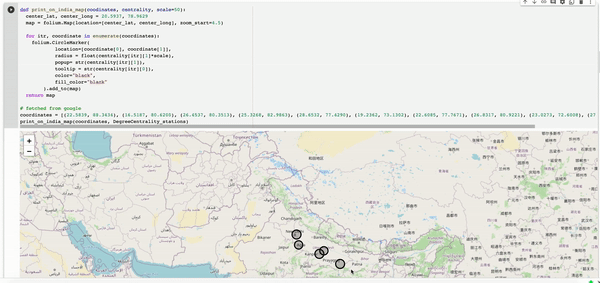

In [ ]:
from IPython.display import Image
Image(open('/content/drive/MyDrive/Network Science Project/Data/Interactive map demo.gif', 'rb').read())

**COMPUTE BETWEENNESS CENTRALITY**

Definition: Betweenness centrality is a measure of the number of times a station node lies on the shortest path between other stations.

***Inference: This measure shows which stations act as a "bridge" connecting other stations together. The stations having a high betweenness centrality will lie on shortest paths between two stations. These stations have a high influence in the network.*** 

The stations which act as a bridge or have high influence on the flow of the network are the following: 

HOWRAH JN. 	
SEALDAH 		
KANPUR CENTR 		 
VIJAYWADA JN 		 
AHMEDABAD 		 
YESVANTPUR J 		
VADODARA JN. 		 
VARANASI JN. 		 
KOLKATA 		 
PILIBHIT JN. 



In [ ]:
BetweennessCentrality_stations = compute_centrality(Railway_Network, "Betweenness", railway_data)
print("Top stations in the Indian Railway System acc to the Betweenness Centrality:\n\n \tSTATION NAME\t\t BETWEENNESS CENTRALITY")
for item in BetweennessCentrality_stations:
  print("\t",item[0],"\t\t",item[1])

Top stations in the Indian Railway System acc to the Betweenness Centrality:

 	STATION NAME		 BETWEENNESS CENTRALITY
	 HOWRAH JN. 		 0.03406351792928565
	 SEALDAH 		 0.021795409939440936
	 KANPUR CENTR 		 0.020930718809083173
	 VIJAYWADA JN 		 0.015177400281457002
	 AHMEDABAD 		 0.014301664879802252
	 YESVANTPUR J 		 0.014256569821548529
	 VADODARA JN. 		 0.012967968029171826
	 VARANASI JN. 		 0.012623744668081235
	 KOLKATA 		 0.011898350401287686
	 PILIBHIT JN. 		 0.01184539309233258


In [ ]:
# fetched from google
coordinates = [(22.5839, 88.3434), (22.5676, 88.3707), (26.4537, 80.3513), (16.5187, 80.6200), (23.0273, 72.6008), (13.0250, 77.5340), (22.3072, 73.1812), (25.3268, 82.9863), (22.6015, 88.3830), (28.6156, 79.8141)]
print_on_india_map(coordinates, BetweennessCentrality_stations, scale=500)

**COMPUTE CLOSENESS CENTRALITY**

Definition: Closeness centrality assigns score to each station node based on their ‘closeness’ to all other stations in the railway network.

***Inference: Closeness Centrality is helpful in finding the stations which are placed to influence the entire railway network most quickly. This measure can help identify good "broadcasters" in a network.***

The stations with the highest closeness centrality in order are the following:
HOWRAH JN. 	
SEALDAH 		
KANPUR CENTR 	
VIJAYWADA JN 		
AHMEDABAD 		
YESVANTPUR J 		 
VADODARA JN. 		 
VARANASI JN. 		 
KOLKATA 		 
PILIBHIT JN. 

In [ ]:
ClosenessCentrality_stations = compute_centrality(Railway_Network, "Closeness", railway_data)
print("Top stations in the Indian Railway System acc to the Closeness Centrality:\n\n \tSTATION NAME\t\t BETWEENNESS CENTRALITY")
for item in ClosenessCentrality_stations:
  print("\t",item[0],"\t\t",item[1])

Top stations in the Indian Railway System acc to the Closeness Centrality:

 	STATION NAME		 BETWEENNESS CENTRALITY
	 HOWRAH JN. 		 0.5124082033874587
	 AHMEDABAD 		 0.5107660799308908
	 VADODARA JN. 		 0.5063522924820026
	 KANPUR CENTR 		 0.5062879529276847
	 VARANASI JN. 		 0.5052287059583946
	 NEW DELHI 		 0.5051966767517281
	 KALYAN JN 		 0.5036640360941574
	 MUGHAL SARAI 		 0.5035049206471066
	 VIJAYWADA JN 		 0.5021406666088064
	 ITARSI 		 0.4998101090743702


In [ ]:
# fetched from google
coordinates = [(22.5839, 88.3434), (23.0273, 72.6008), (22.3072, 73.1812), (22.5676, 88.3707), (25.3268, 82.9863), (28.6429, 77.2191), (19.2403, 73.1305), (25.2838, 83.1156), (16.5187, 80.6200), (22.6085, 77.7671)]
print_on_india_map(coordinates, ClosenessCentrality_stations, scale=20)

**COMPUTE EIGEN VECTOR CENTRALITY**

Definition: This measure works like degree centrality, by measuring a station's influence over the others based on its degree but it also takes into account things like well-connectedness of a station and how many nodes are the connections connected to, and so on, throughout the network.

***Inferences:
Eigen Vector Centrality is a good all rounder measure. It shows which stations have influence over the entire network, not just the stations it is connected to.***

The stations which have highest eigen vector centrality are: 
VARANASI JN. 		
HOWRAH JN. 		 
KANPUR CENTR 	
ITARSI 		 
NEW DELHI 	
LUDHIANA JN. 
MATHURA JN. 
KALYAN JN 		
PATNA JN. 		
MUGHAL SARAI 	

In [ ]:
EigenVectorCentrality_stations = compute_centrality(Railway_Network, "Eigen Vector", railway_data)
print("Top stations in the Indian Railway System acc to the Eigen Vector Centrality:\n\n \tSTATION NAME\t\t BETWEENNESS CENTRALITY")
for item in EigenVectorCentrality_stations:
  print("\t",item[0],"\t\t",item[1])

Top stations in the Indian Railway System acc to the Eigen Vector Centrality:

 	STATION NAME		 BETWEENNESS CENTRALITY
	 VARANASI JN. 		 0.07072646825994845
	 HOWRAH JN. 		 0.0696564673531263
	 KANPUR CENTR 		 0.06676069453032213
	 ITARSI 		 0.06674728443587287
	 NEW DELHI 		 0.06624320025503437
	 LUDHIANA JN. 		 0.06593208791866616
	 MATHURA JN. 		 0.06569071466478024
	 KALYAN JN 		 0.06527068019550916
	 PATNA JN. 		 0.06473312502358505
	 MUGHAL SARAI 		 0.06457963445769375


In [ ]:
# fetched from google
coordinates = [(25.3268, 82.9863), (22.5839, 88.3434), (22.5676, 88.3707), (22.6085, 77.7671), (28.6429, 77.2191), (30.9135, 75.8479), (27.4790, 77.6734), (19.2403, 73.1305), (25.6033, 85.1370), (25.2838, 83.1156)]
print_on_india_map(coordinates, EigenVectorCentrality_stations, scale=200)

## Inference based on Geographic Location 

The main stations in the Indian Railway Network based on the station(node)-degree relationship can be inferred from the degree centrality. These stations are further classified into two groups, based on their geographic locations: 
1. Stations that are near metropolitan cities in India. 
  For example: Howrah which is near Calcutta, Ghaziabad near New Delhi and Kalyan station near Mumbai
2. Stations that are located in the central parts of the country, or at the meetin points of railway lines connecting different zones of the country. 
  For example: Vadodara Junction, Vijaywada Junction. 
  **These stations are potential points of congestion in the network as they do not have much resources as compared to the stations near metropolitan states.**

  All these nodes handle a high amount of traffic. 


  For example: 
  1. Howrah- Near Calcutta which is a metropolitan city. (Type 1)
  Likely to have more resources. 

  2. Itarsi- Falls in the central region of the country. (Type 2)
  Likely to have less resources and cause congestion.
  

## General Analysis

1. Number of trains running in the IRN

In [ ]:
print('Number of trains:', len(np.unique(modified_railway_data['Train Name'].astype('str'))))
print('Number of stations:', len(np.unique(modified_railway_data['Station Code'].astype('str'))))

Number of trains: 7580
Number of stations: 8147


2. Distance Metrics

In [ ]:
distances = modified_railway_data['Distance'].astype('int')
longest_route_df = modified_railway_data[modified_railway_data['Distance']==str(distances.max())]
distances = distances.replace(0, distances.max())
shortest_route_df = modified_railway_data[modified_railway_data['Distance']==str(distances.min())]
print('Longest train route:', distances.max(), 'km. Train = ', longest_route_df['Train No'].iloc[0], longest_route_df['Train Name'].iloc[0], '. Starting station: ', longest_route_df['Source Station Name'].iloc[0], '. Ending Station: ', longest_route_df['Destination Station Name'].iloc[0])
print('Shortest train route:', distances.min(), 'km. Train = ', shortest_route_df['Train No'].iloc[0], shortest_route_df['Train Name'].iloc[0], '. Starting station: ', shortest_route_df['Source Station Name'].iloc[0], '. Ending Station: ', shortest_route_df['Destination Station Name'].iloc[0])

trains = np.unique(modified_railway_data['Train Name'].astype('str'))
max_distance_between_stations = 0
min_distance_between_stations = distances.max()
min_train_name = ''
max_train_name = ''
average_train_route_distance = 0
average_distance_between_stops = 0
# iterate over all trains
for train_name in trains:
  train_route = modified_railway_data.loc[modified_railway_data['Train Name'] == train_name]
  station_distances = train_route['Distance'].to_list()
  for station_itr in range(len(station_distances)-1):
    distance = int(station_distances[station_itr+1]) - int(station_distances[station_itr])
    if distance < min_distance_between_stations and distance > 0:
      min_distance_between_stations = distance
      min_train_name = train_name
    if distance > max_distance_between_stations:
      max_distance_between_stations = distance
      max_train_name = train_name
  average_train_route_distance+=int(station_distances[-1])

average_distance_between_stops = average_train_route_distance
average_train_route_distance/=len(trains)
average_distance_between_stops/=modified_railway_data['Station Code'].shape[0]
print("Maximum distance between any two consecutive stations:", max_distance_between_stations, ' km with train', max_train_name)
print("Minimum distance between any two consecutive stations:", min_distance_between_stations, ' km with train', min_train_name)
print("Average total train route distance:", round(average_train_route_distance, 2), 'km')
print("Average distance between consecutive stops", round(average_distance_between_stops, 2), 'km')

Longest train route: 4260 km. Train =  15905 CAPE - DBRG . Starting station:  KANNIYAKUMARI . Ending Station:  DIBRUGARH
Shortest train route: 1 km. Train =  3308 PLJE-SZE MEM . Starting station:  PHULWARTANR . Ending Station:  SONARDIH
Maximum distance between any two consecutive stations: 1301  km with train RSD-PJP BSF
Minimum distance between any two consecutive stations: 1  km with train  LGL KNJ EMU
Average total train route distance: 439.7 km
Average distance between consecutive stops 17.91 km
